In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot

In [2]:
df = utils.get_dataset()

In [3]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [5]:
df = preprocessing.impute_income_KNN(df)

In [6]:
# get a list of all columns
columns = df.columns.tolist()

In [7]:
# remove target feature Response from the list
columns.remove("Response")

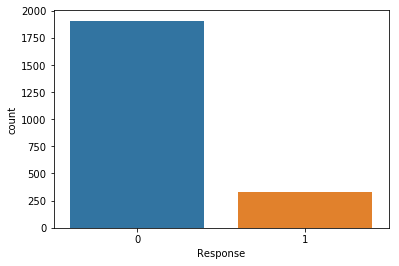

In [8]:
# very imbalanced dataset
countplot(x="Response", data=df)

In [13]:
seed = 0 

In [14]:
%%capture
# transform the df to X_f using the exact ratio of 0 and 1: 17%
X_f = preprocessing.centroid_undersampling(X=df, f=0.17)

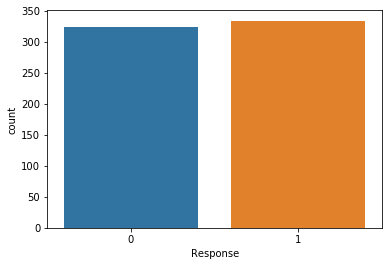

In [15]:
# now the dataset is balanced
countplot(x="Response", data=X_f)

In [16]:
# perform the train, test split
X_train, X_test, y_train, y_test = utils.data_split(X_f, test_size=0.2, random_state=seed)

In [19]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [165]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(6, activation="relu", input_dim=32))
model.add(layers.Dense(6, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])


In [166]:
model.fit(X_train, y_train, epochs=100)
y_predicted = model.predict(X_test)


Epoch 1/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6941 - acc: 0.4905
Epoch 2/100
526/526 [==============================] - 0s 39us/step - loss: 0.6909 - acc: 0.5361
Epoch 3/100
526/526 [==============================] - 0s 47us/step - loss: 0.6892 - acc: 0.5684
Epoch 4/100
526/526 [==============================] - 0s 47us/step - loss: 0.6881 - acc: 0.5837
Epoch 5/100
526/526 [==============================] - 0s 42us/step - loss: 0.6868 - acc: 0.5913
Epoch 6/100
526/526 [==============================] - 0s 36us/step - loss: 0.6856 - acc: 0.5989
Epoch 7/100
526/526 [==============================] - 0s 42us/step - loss: 0.6842 - acc: 0.6350
Epoch 8/100
526/526 [==============================] - 0s 45us/step - loss: 0.6823 - acc: 0.6464
Epoch 9/100
526/526 [==============================] - 0s 38us/step - loss: 0.6804 - acc: 0.6369
Epoch 10/100
526/526 [==============================] - 0s 38us/step - loss: 0.6778 - acc: 0.6407
Epoch 11/100
526/526 [========

526/526 [==============================] - 0s 40us/step - loss: 0.3557 - acc: 0.8308
Epoch 85/100
526/526 [==============================] - 0s 40us/step - loss: 0.3550 - acc: 0.8441
Epoch 86/100
526/526 [==============================] - 0s 38us/step - loss: 0.3525 - acc: 0.8422
Epoch 87/100
526/526 [==============================] - 0s 39us/step - loss: 0.3532 - acc: 0.8384
Epoch 88/100
526/526 [==============================] - 0s 38us/step - loss: 0.3512 - acc: 0.8441
Epoch 89/100
526/526 [==============================] - 0s 36us/step - loss: 0.3494 - acc: 0.8441
Epoch 90/100
526/526 [==============================] - 0s 39us/step - loss: 0.3487 - acc: 0.8403
Epoch 91/100
526/526 [==============================] - 0s 39us/step - loss: 0.3496 - acc: 0.8403
Epoch 92/100
526/526 [==============================] - 0s 37us/step - loss: 0.3469 - acc: 0.8460
Epoch 93/100
526/526 [==============================] - 0s 37us/step - loss: 0.3461 - acc: 0.8441
Epoch 94/100
526/526 [===========

In [167]:
model.evaluate(X_test, y_test)

132/132 [==============================] - 0s 2ms/step


[0.5205324815981316, 0.7651515151515151]

In [168]:
y_pred = []
for i in y_predicted:
    if i < 0.5:
        i=0
        y_pred.append(i)
    else:
        i=1
        y_pred.append(i)

Normalized confusion matrix
[[0.77966102 0.22033898]
 [0.24657534 0.75342466]]


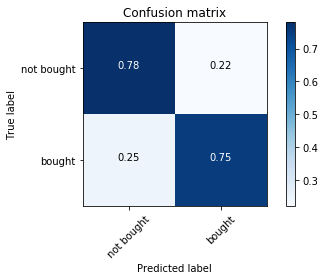

In [169]:
conf_matrix = utils.confusion_matrix(y_test, y_pred)

data_visualization.plot_confusion_matrix(conf_matrix, ['not bought', 'bought'], normalize=True)

In [161]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))

Accuracy 0.78
Area under the curve 0.78
Precision 0.75
Recall 0.83
